In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [30]:
df = pd.read_csv('wine.csv')

In [31]:
df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color,is_red,high_quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,1.0,0.0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red,1.0,0.0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red,1.0,0.0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red,1.0,0.0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,1.0,0.0


In [32]:
X_train, X_test, y_train, y_test = train_test_split(df[['density','sulphates','pH']], df['high_quality'], test_size=0.3)

In [33]:
X_train.head()

,density,sulphates,pH
3424,0.99440,0.60,3.42
1446,0.99712,0.75,3.40
4444,0.99311,0.56,3.15
882,0.99536,0.78,3.22
3667,0.99060,0.37,3.44


In [34]:
classifier = KNeighborsClassifier(n_neighbors=3)
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [35]:
predictions = classifier.predict(X_test)
print(predictions)

[0. 0. 0. ... 0. 1. 1.]


In [36]:
correct = np.where(predictions==y_test, 1, 0).sum()
print(correct)

1533


In [37]:
accuracy = correct/len(y_test)
print(accuracy)

0.7861538461538462


In [41]:
results = []

for i in range(1, 101, 2):
    classifier = KNeighborsClassifier(n_neighbors=i)
    classifier.fit(X_train, y_train)
    predictions = classifier.predict(X_test)
    correct = np.where(predictions==y_test, 1, 0).sum()
    accuracy = correct/len(y_test)
    print(i, accuracy)
    results.append([i, accuracy])

1 0.8056410256410257
3 0.7861538461538462
5 0.7912820512820513
7 0.7964102564102564
9 0.7948717948717948
11 0.7984615384615384
13 0.8066666666666666
15 0.8
17 0.801025641025641
19 0.7979487179487179
21 0.8025641025641026
23 0.8005128205128205
25 0.8015384615384615
27 0.801025641025641
29 0.8015384615384615
31 0.8035897435897436
33 0.803076923076923
35 0.8020512820512821
37 0.8046153846153846
39 0.8061538461538461
41 0.8066666666666666
43 0.8071794871794872
45 0.8066666666666666
47 0.8076923076923077
49 0.8066666666666666
51 0.8071794871794872
53 0.8056410256410257
55 0.8066666666666666
57 0.8066666666666666
59 0.8066666666666666
61 0.8066666666666666
63 0.8066666666666666
65 0.8066666666666666
67 0.8066666666666666
69 0.8066666666666666
71 0.8066666666666666
73 0.8066666666666666
75 0.8066666666666666
77 0.8066666666666666
79 0.8066666666666666
81 0.8066666666666666
83 0.8066666666666666
85 0.8066666666666666
87 0.8066666666666666
89 0.8066666666666666
91 0.8066666666666666
93 0.806666

In [42]:
results = pd.DataFrame(results, columns=["k","accuracy"])

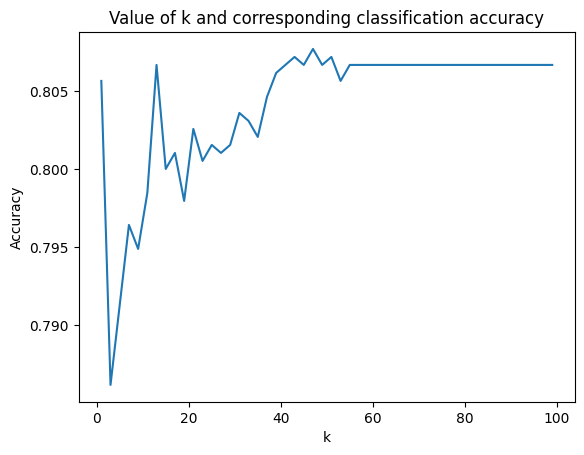

In [43]:
plt.plot(results.k, results.accuracy)
plt.title("Value of k and corresponding classification accuracy")
plt.xlabel("k")
plt.ylabel("Accuracy")
plt.show()